# Introduction

# Data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as skpp
import seaborn as sns
import scipy.stats as scst

Loading the dataset to dataframe, printing its informations

In [8]:
df = pd.read_csv('../data/insurance.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**now** we can see or data headline

In [9]:
df.info()
print('\n', "_" * 40, '\n')
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

 ________________________________________ 



,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


We draw a line to separate the data

## Exploration

In [10]:
for col in df.columns:
    print('\n', "_" * 40, '\n')
    print(f"\nColumn Name: {col}\n")

    print(f"Data Type: {df[col].dtype}")

    missing_count = df[col].isnull().sum()
    print(f"Missing Values: {missing_count}")

    if df[col].dtype == object:
        unique_values = df[col].unique()
        print(f"Unique Values: {', '.join(unique_values)}")
        value_counts = df[col].value_counts()
        print(f"Value Counts:\n{value_counts}")

    elif df[col].dtype == int or df[col].dtype == float:
        print(f"Descriptive Statistics:")
        print(df[col].describe())


 ________________________________________ 


Column Name: age

Data Type: int64
Missing Values: 0
Descriptive Statistics:
count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

 ________________________________________ 


Column Name: sex

Data Type: object
Missing Values: 0
Unique Values: female, male
Value Counts:
sex
male      676
female    662
Name: count, dtype: int64

 ________________________________________ 


Column Name: bmi

Data Type: float64
Missing Values: 0
Descriptive Statistics:
count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

 ________________________________________ 


Column Name: children

Data Type: int64
Missing Values: 0
Descriptive Statistics:
count    1338.000000
mean        1.0

show matplotlib ....

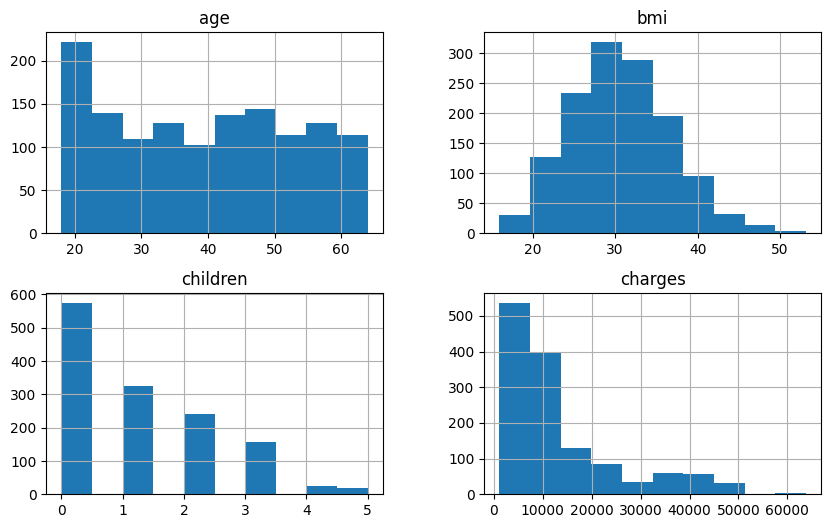

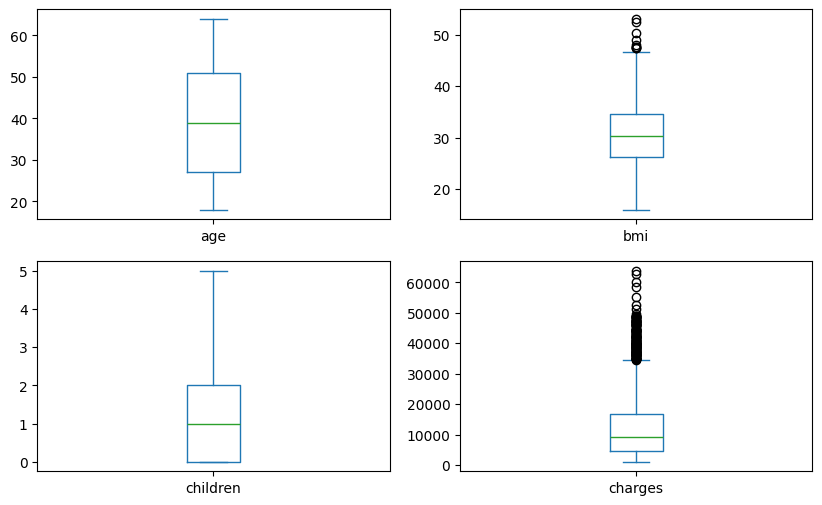

In [11]:
df.hist(figsize=(10, 6))
plt.show()

df.plot(kind='box', subplots=True, layout=(2, 2), figsize=(10, 6))
plt.show()

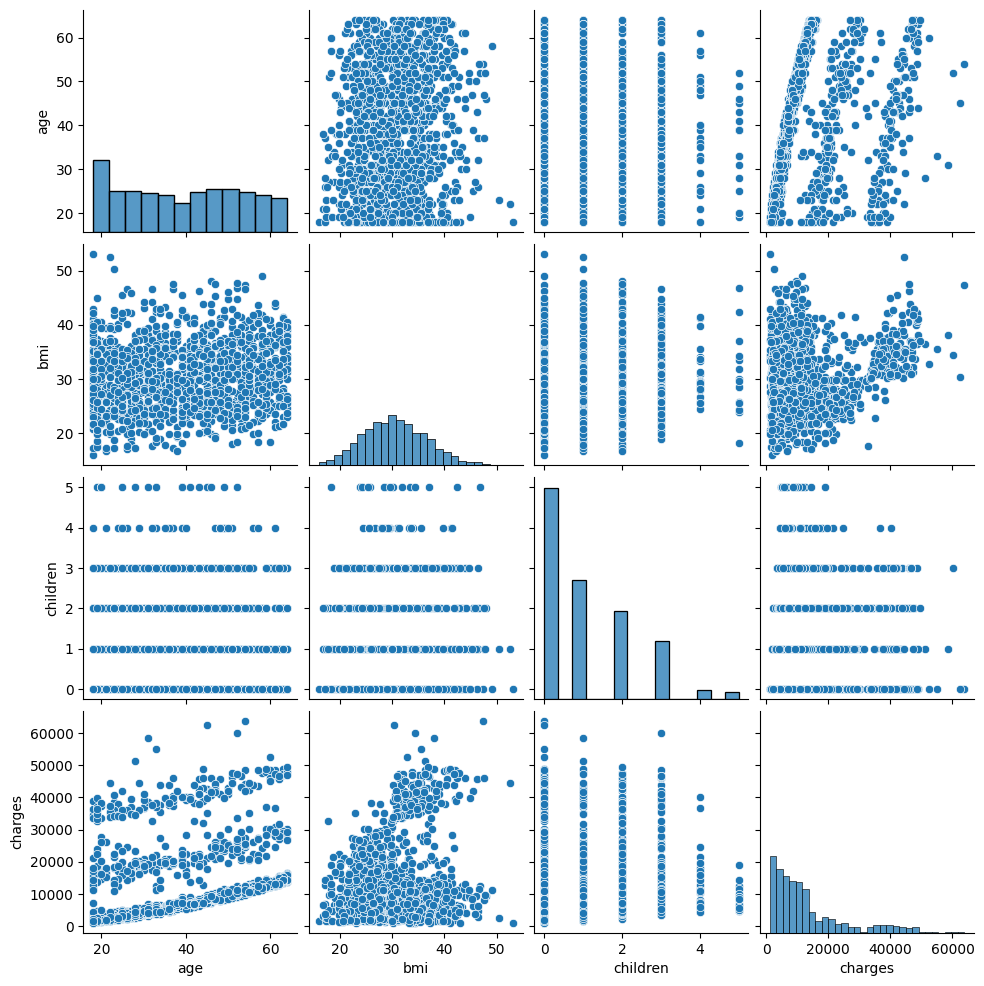

In [12]:
sns.pairplot(df)

<Axes: >

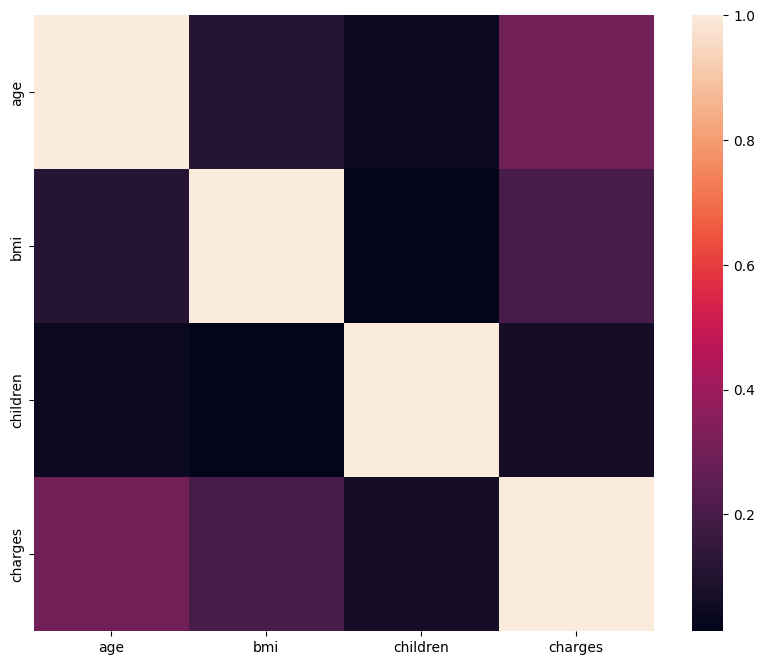

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr())

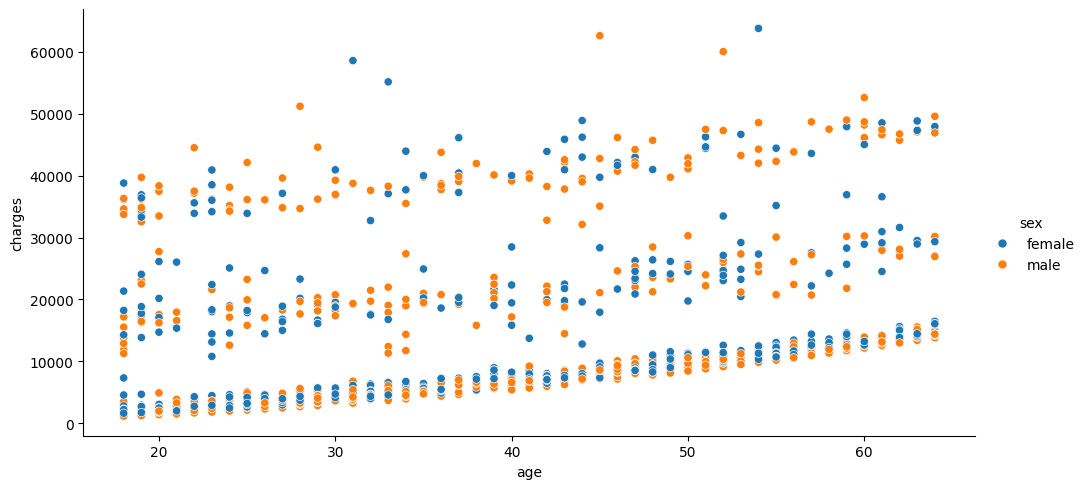

In [14]:
sns.relplot(data=df, x='age', y='charges', hue='sex', aspect=2)

<Axes: xlabel='smoker', ylabel='charges'>

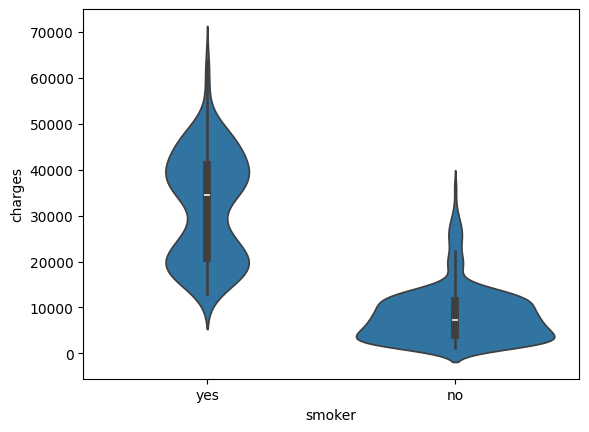

In [15]:
sns.violinplot(x = "smoker", y = "charges", data=df)

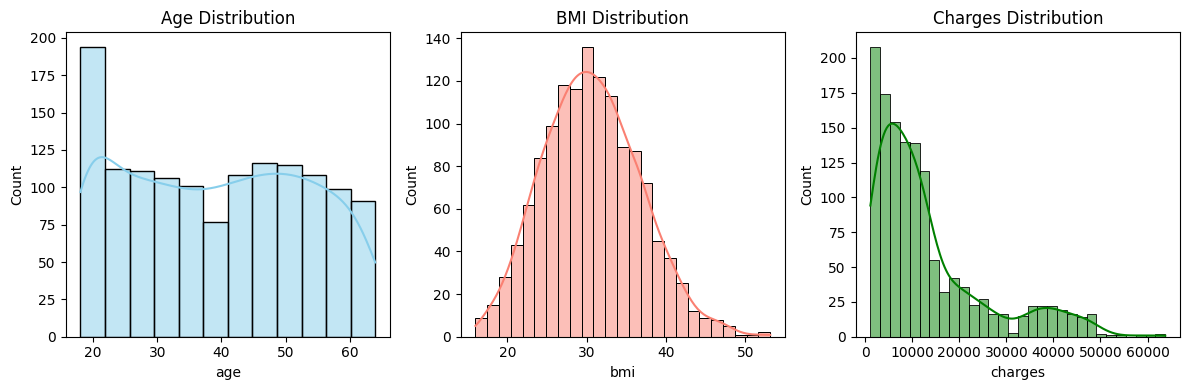

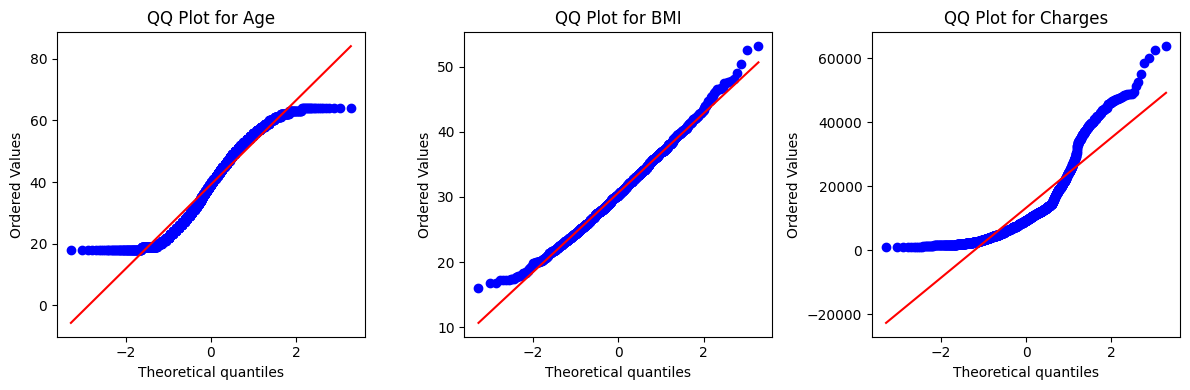

Feature: age
Shapiro-Wilk p-value: 0.00000 (Not normal)
D'Agostino-Pearson p-value: 0.00000 (Not normal)

Conclusion: age does not follow a Gaussian distribution.

 ________________________________________ 

Feature: bmi
Shapiro-Wilk p-value: 0.00003 (Normal)
D'Agostino-Pearson p-value: 0.00015 (Normal)

Conclusion: bmi follows a Gaussian distribution.

 ________________________________________ 

Feature: charges
Shapiro-Wilk p-value: 0.00000 (Not normal)
D'Agostino-Pearson p-value: 0.00000 (Not normal)

Conclusion: charges does not follow a Gaussian distribution.

 ________________________________________ 



In [16]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.histplot(df['age'], kde=True, color='skyblue')
plt.title('Age Distribution')

plt.subplot(132)
sns.histplot(df['bmi'], kde=True, color='salmon')
plt.title('BMI Distribution')

plt.subplot(133)
sns.histplot(df['charges'], kde=True, color='green')
plt.title('Charges Distribution')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(131)
scst.probplot(df['age'], plot=plt)
plt.title('QQ Plot for Age')

plt.subplot(132)
scst.probplot(df['bmi'], plot=plt)
plt.title('QQ Plot for BMI')

plt.subplot(133)
scst.probplot(df['charges'], plot=plt)
plt.title('QQ Plot for Charges')

plt.tight_layout()
plt.show()

alpha = 0.000005

for col in ['age', 'bmi', 'charges']:
    _, p_shapiro = scst.shapiro(df[col])
    _, p_dagostino = scst.normaltest(df[col])

    print(f"Feature: {col}")
    print(f"Shapiro-Wilk p-value: {p_shapiro:.5f} ({'Not normal' if p_shapiro < alpha else 'Normal'})")
    print(f"D'Agostino-Pearson p-value: {p_dagostino:.5f} ({'Not normal' if p_dagostino < alpha else 'Normal'})\n")

    if p_shapiro < alpha or p_dagostino < alpha:
        print(f"Conclusion: {col} does not follow a Gaussian distribution.")
    else:
        print(f"Conclusion: {col} follows a Gaussian distribution.")
    print('\n', "_" * 40, '\n')

## Preprocessing

In [17]:
le_sex = skpp.LabelEncoder()
df['sex_encoded'] = le_sex.fit_transform(df['sex'])

le_smoker = skpp.LabelEncoder()
df['smoker_encoded'] = le_smoker.fit_transform(df['smoker'])

le_region = skpp.LabelEncoder()
df['region_encoded'] = le_region.fit_transform(df['region'])
df.drop(['sex', 'smoker', 'region'], axis=1, inplace=True)

In [18]:
scaler = skpp.StandardScaler()
df_scaled = scaler.fit_transform(df[['age', 'bmi', 'children']])
df[['age_scaled', 'bmi_scaled', 'children_scaled']] = pd.DataFrame(df_scaled, columns=['age_scaled', 'bmi_scaled', 'children_scaled'])
df.drop(['age', 'bmi', 'children'], axis=1, inplace=True)

In [19]:
print(df.head())

       charges  sex_encoded  smoker_encoded  region_encoded  age_scaled  \
0  16884.92400            0               1               3   -1.438764   
1   1725.55230            1               0               2   -1.509965   
2   4449.46200            1               0               2   -0.797954   
3  21984.47061            1               0               1   -0.441948   
4   3866.85520            1               0               1   -0.513149   

   bmi_scaled  children_scaled  
0   -0.453320        -0.908614  
1    0.509621        -0.078767  
2    0.383307         1.580926  
3   -1.305531        -0.908614  
4   -0.292556        -0.908614  


## Feature Engineering

# Model

## Model Selection and Evaluation

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"Linear - Mean Squared Error: {mse:.4f}")
print(f"Linear - R-squared: : {r2:.4f}")


Linear - Mean Squared Error: 33635210.4312
Linear - R-squared: : 0.7833


In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"Decision Tree - Mean Squared Error: {mse:.4f}")
print(f"Decision Tree - R-squared: : {r2:.4f}")


Decision Tree - Mean Squared Error: 24679037.8596
Decision Tree - R-squared: : 0.8410


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"Random Forest - Mean Squared Error: {mse:.4f}")
print(f"Random Forest - R-squared:  {r2:.4f}")


Random Forest - Mean Squared Error: 20831334.1324
Random Forest - R-squared:  0.8658


In [23]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVR(kernel='linear')
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"SVR (Linear Kernel) - Mean Squared Error: {mse:.4f}")
print(f"SVR (Linear Kernel) - R-squared: {r2:.4f}")


SVR (Linear Kernel) - Mean Squared Error: 162740758.0814
SVR (Linear Kernel) - R-squared: -0.0483


## Model Tuning

## Model interpretion